# **Task 4:** Predicting Insurance Claim Amounts

### **Objective:**
To predict the medical insurance cost of a person based on their personal features

### **What We Did:**
- Cleaned the dataset and encoded categorical values
- Visualized relationships between age, bmi, and charges
- Trained a Linear Regression model
- Evaluated model using MAE and RMSE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [2]:
insurance_df = pd.read_csv(r"C:\Users\Hp\Downloads\DevelopersHub tasks\Task 4\insurance.csv")
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance_df.shape

(1338, 7)

In [8]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

                                Task4_Predicting Insurance Claim Amounts Visulazition                                                                

In [10]:
le = LabelEncoder()
insurance_df['sex'] = le.fit_transform(insurance_df['sex'])         # male:1, female:0
insurance_df['smoker'] = le.fit_transform(insurance_df['smoker'])   # yes:1, no:0
insurance_df['region'] = le.fit_transform(insurance_df['region'])   # multiple values to 0/1/2/3


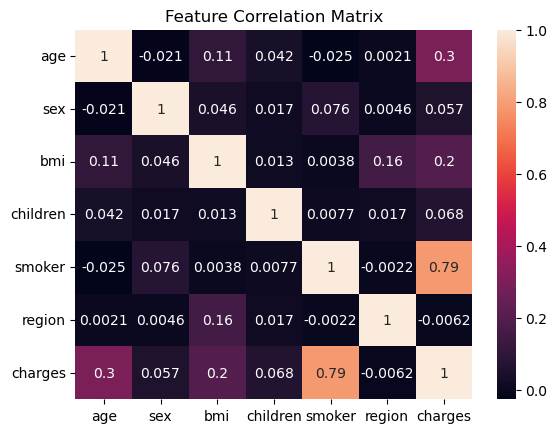

In [11]:
sns.heatmap(insurance_df.corr(), annot=True)
plt.title("Feature Correlation Matrix")
plt.show()



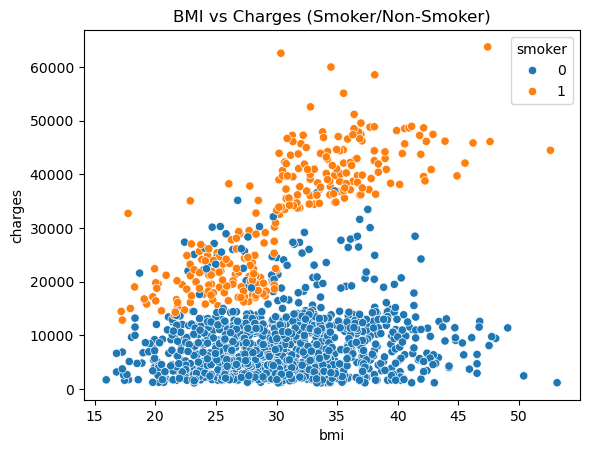

In [12]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance_df)
plt.title("BMI vs Charges (Smoker/Non-Smoker)")
plt.show()

In [13]:
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 4186.508898366435
RMSE: 5799.587091438356


In [14]:
import joblib
joblib.dump(model, 'insurance_model.pkl')

['insurance_model.pkl']

In [15]:
joblib.load('insurance_model.pkl')

LinearRegression()

### **Conclusion:**
1. The estimated medical insurance claim amount based on personal data can be predicted using a linear regression model. 
2. The model achieved a mean absolute error (MAE) of 4186.5088 and a root mean squared error (RMSE) of 5799.5870.

### **Insights:**
- MAE: 4186.508
- RMSE: 5799.587
- Smoking and BMI were strongest predictors of charges